Devemos analisar uma base de dados com informações de condições de solo e temperatura, relacionados com o tipo de produto agrícola.

Além da análise d edados, deveremos construir alguns modelos preditivos e compará-los em termos da sua performance.

**Colunas:**
- N: Quantidade de nitrogênio no solo
- P: Quantidade de fósforo no solo
- K: Quantidade de potássio no solo
- temperature: Temperatura média da região em graus Celsius
- humidity: Umidade média do ar na região
- pH: pH do solo
- rainfall: precipitação em milímetros
- label: tipo de cultura plantada nas condições daquela linha

**Propostas:**
1. Fazer uma análise exploratória na base para se familiarizar com os dados
2. Fazer uma análise descritiva narrando os principais achados da base contendo no mínimo cinco gráficos
3. Encontrar o “perfil ideal” de solo/clima para as plantações, além de discorrer sobre como os três produtos distintos (à escolha do grupo) se comparam com esse perfil ideal. Por exemplo, preferem maior umidade e mais precipitação? Preferem mais calor e menos fósforo? Para esta parte se apoie em análises estatísticas e/ou visuais
4. Desenvolver 5 modelos preditivos (cada um com um algoritmo diferente, conforme visto no capítulo 14) que dadas as condições climáticas e de solo prevejam qual é o melhor produto agrícola a ser cultivado naquelas características. Esta parte da tarefa inclui seguir as boas práticas dos projetos de Machine Learning, bem como avaliar o modelo com métricas pertinentes ao problema.

### 1) Análise exploratória

In [72]:
import pandas as pd

df = pd.read_csv('produtos_agricolas.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [73]:
# Quantidade de linhas x Quantidade de colunas
df.shape

(2200, 8)

In [74]:
# Verificando o tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [75]:
# Análise Estatística Descritiva

df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [76]:
# Verificando a quantidade de cada tipo de label
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [77]:
print("Labels únicas:", len(pd.unique(df['label'])))

Labels únicas: 22


É possível observar que temos um problema multiclasse, pois temos na nossa base de dados 22 labels únicas.

Cada classe contem 100 dados cada, portanto, temos uma boa distribuição dos dados para cada categoria.

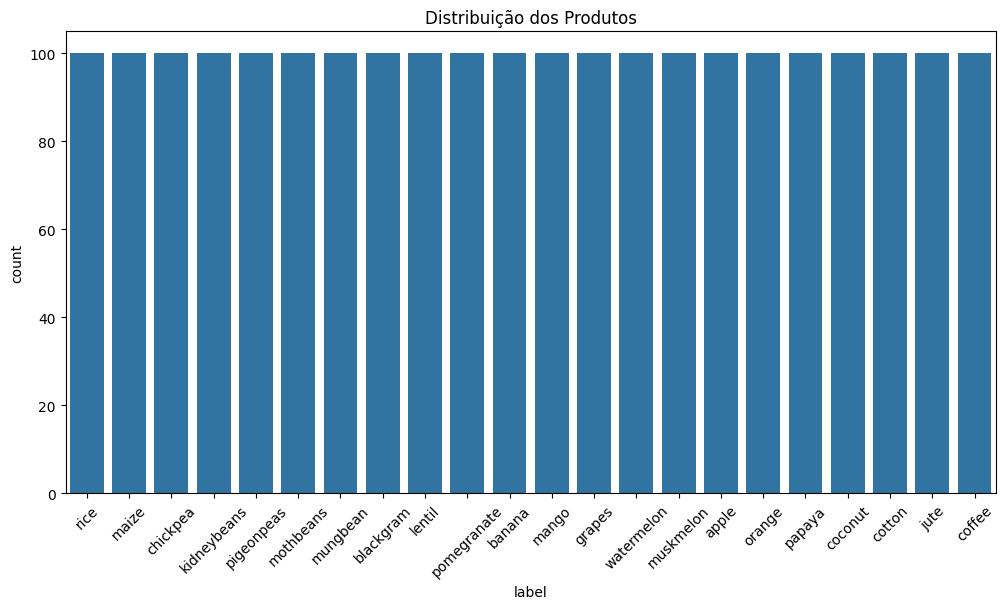

In [78]:
# Distribuição dos labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df)
plt.title('Distribuição dos Produtos')
plt.xticks(rotation=45)
plt.show()

Como dito anteriormente, é possível observar que todos os dados estão igualmente distribuidos em relação aos labels.

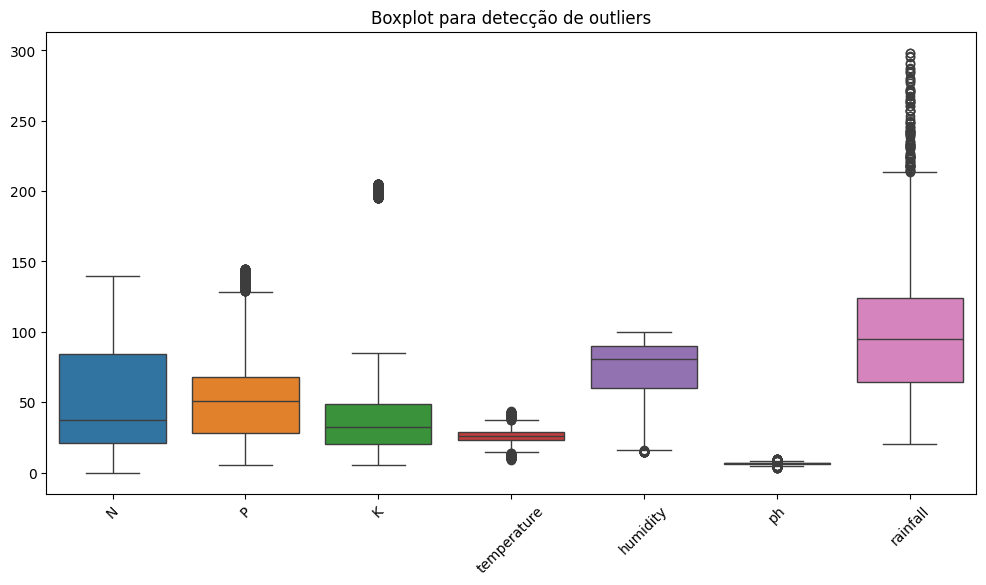

In [79]:
# Detecção de Outliers
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.title("Boxplot para detecção de outliers")
plt.xticks(rotation=45)
plt.show()

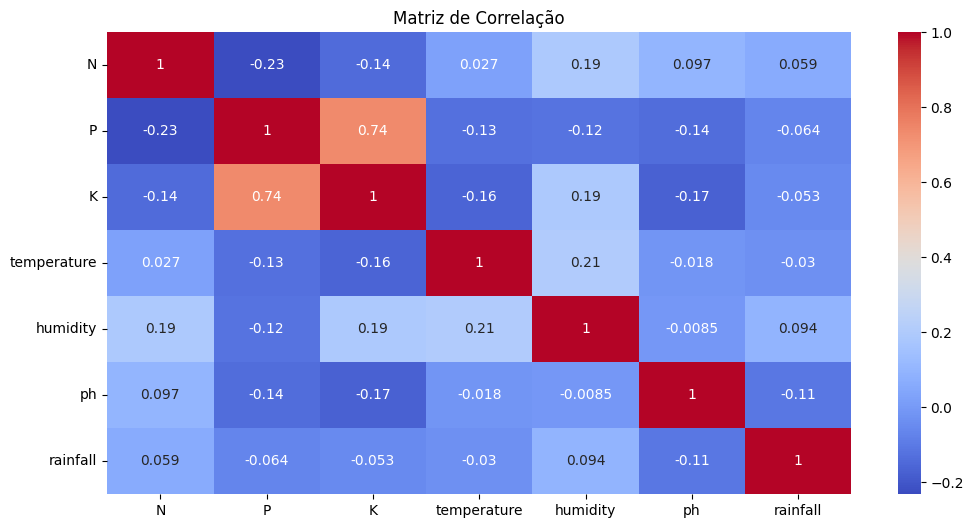

In [80]:
# Matriz de correlação

plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()